##### Install and import packages

In [1]:
!pip install pandas-ods-reader
!pip install impyute
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_ods_reader import read_ods
from impyute.imputation.cs import mice
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
import pickle

##### Import Input Data from Local

In [2]:
path = "C:/Users/tdong/Desktop/AT/Data.ods"
df = read_ods(path)

##### Check raw data

In [3]:
df.head(10)

,consumer_id,gender,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed
0,1284b75c-ecae-4015-8e3d-359c0347ede8,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,174.0,0.0,1.0,3.0,3.0,8.0,52.0,1.0,1.0,1.0,1.0
1,128af162-d2c3-4fe4-986c-359c8bdc6c04,None,0.0,1.0,1.0,1.0,0.0,NaN,185.0,174.0,0.0,1.0,3.0,8.0,5.0,58.0,1.0,1.0,1.0,1.0
2,12aada5e-36eb-4e9e-8d62-359c076c1b40,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,174.0,0.0,1.0,3.0,4.0,9.0,183.0,1.0,1.0,1.0,3.0
3,12c2e02f-bc79-4048-83ba-359cd3280dcf,None,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,0.0,1.0,3.0,7.0,4.0,56.0,1.0,1.0,1.0,1.0
4,12fabdf0-0582-489e-a6d3-35509ab8ae6f,f,1.0,1.0,1.0,1.0,1.0,22.0,572.0,173.0,0.0,1.0,4.0,6.0,7.0,83.0,1.0,1.0,1.0,3.0
5,811625dc-6e1e-476f-bdc2-359b0b0abe20,None,0.0,1.0,1.0,1.0,0.0,NaN,193.0,174.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0
6,815d231a-d382-4aa2-8e21-359c9be5e423,f,1.0,1.0,1.0,1.0,1.0,17.0,185.0,174.0,0.0,1.0,1.0,1.0,4.0,22.0,1.0,1.0,1.0,2.0
7,818c43e7-df25-4e8b-a274-355e49e8f505,f,1.0,1.0,1.0,1.0,1.0,20.0,502.0,176.0,0.0,1.0,2.0,3.0,11.0,62.0,1.0,1.0,1.0,1.0
8,2a9258b2-0f10-4a84-ac08-359e39e3dd5c,None,0.0,1.0,1.0,1.0,0.0,NaN,177.0,174.0,0.0,1.0,1.0,2.0,4.0,12.0,1.0,1.0,1.0,1.0
9,2b07ca5f-a254-4b5a-a24d-359c01d502ee,None,0.0,1.0,1.0,1.0,0.0,NaN,188.0,177.0,0.0,1.0,3.0,4.0,4.0,49.0,1.0,1.0,1.0,2.0


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   consumer_id           10000 non-null  object 
 1   gender                5478 non-null   object 
 2   has_gender            10000 non-null  float64
 3   has_first_name        10000 non-null  float64
 4   has_last_name         10000 non-null  float64
 5   has_email             10000 non-null  float64
 6   has_dob               10000 non-null  float64
 7   customer_age          4064 non-null   float64
 8   account_age           10000 non-null  float64
 9   account_last_updated  10000 non-null  float64
 10  account_status        10000 non-null  float64
 11  app_downloads         10000 non-null  float64
 12  unique_offer_clicked  10000 non-null  float64
 13  total_offer_clicks    10000 non-null  float64
 14  unique_offer_rides    10000 non-null  float64
 15  total_offer_rides   

In [5]:
df.describe()

,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,account_status,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4064.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.547800,0.998000,0.995900,0.999200,0.406400,22.980807,245.816600,174.256700,0.0,1.032200,3.172400,5.825600,7.516500,68.429900,1.003003,1.001300,1.005700,1.880900
std,0.497735,0.044679,0.063903,0.028274,0.491185,8.504064,130.090693,0.895145,0.0,0.186994,2.059831,5.290424,3.490264,69.591347,0.046453,0.036034,0.079172,1.187121
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,174.000000,173.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,184.000000,174.000000,0.0,1.000000,2.000000,2.000000,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,187.000000,174.000000,0.0,1.000000,3.000000,4.000000,7.000000,47.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,193.000000,174.000000,0.0,1.000000,4.000000,8.000000,10.000000,90.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,649.000000,187.000000,0.0,5.000000,14.000000,62.000000,25.000000,1693.000000,2.500000,2.000000,4.000000,11.000000


##### Check missing values

In [6]:
def missing_value(df1):
  missing1=df1.isnull().mean().mul(100).sort_values(ascending=False).to_frame('Missing_perc').reset_index()
  return missing1
missing_value(df).head(5)

,index,Missing_perc
0,customer_age,59.36
1,gender,45.22
2,consumer_id,0.00
3,app_downloads,0.00
4,max_claims,0.00


In [7]:
df.gender.value_counts(dropna=False)

NaN    4522
m      2864
f      2614
Name: gender, dtype: int64

Found there are 2 features with missing values ('customer_age', 'gender'). I will treat them differently as gender is categorical feature and customer_age is continuos feature.

In [8]:
#impute missing gender for later use
missing_cat_list=['gender']
for i in missing_cat_list:
  df[i].fillna('missing', inplace=True)

In [9]:
#impute age using MICE (Multivariate Imputation by Chained Equations)
df_dropped= df.drop(['consumer_id','gender'], axis=1)
imputed = mice(df_dropped.values)
mice_ages = imputed[:, 5]
df['customer_age_imputed']= [round(age,0) for age in mice_ages]
df['customer_age_imputed'] = df['customer_age_imputed'].apply(lambda x: 15 if (x<15) else x)
df['customer_age_imputed'] = df['customer_age_imputed'].apply(lambda x: 119 if (x>119) else x)

In [10]:
def list_non_unique_features_pdf(data, drop=True):

    if not isinstance(data, pd.core.frame.DataFrame):
        raise AssertionError("Data is not a pandas DataFrame")

    all_missing_cols = [
        col
        for col, n_uniques in data.apply(lambda x: len(x.unique()), axis=0).iteritems()
        if n_uniques <= 1
    ]

    if len(all_missing_cols) == 0:
        print("No columns contain a single value or all missing")
    else:
        msg = ("Columns which only contain a single value or all missing : {}").format(
            (", ").join(col for col in all_missing_cols)
        )

        print(msg)

        if drop:
            data = data.drop(all_missing_cols, axis=1)

    return all_missing_cols

list_non_unique_features_pdf(df)

Columns which only contain a single value or all missing : account_status


['account_status']

In [11]:
df['account_status'].value_counts()

0.0    10000
Name: account_status, dtype: int64

'account_status' has only 1 value so it is not useful for modeling or profiling

#### Find Duplicates

In [12]:
df.duplicated(subset = 'consumer_id',keep=False).sum()

224

Found couple hundreds of duplicates 'consumer_id' in the data. Check futher the duplicates are similar in most of the feature but "app_downloads". I consider create a new feature to keep tracking those in later stage

In [13]:
df[df["consumer_id"].duplicated(keep=False)].sort_values(['consumer_id'],ascending=False)

,consumer_id,gender,has_gender,has_first_name,has_last_name,has_email,has_dob,customer_age,account_age,account_last_updated,...,app_downloads,unique_offer_clicked,total_offer_clicks,unique_offer_rides,total_offer_rides,avg_claims,min_claims,max_claims,total_offers_claimed,customer_age_imputed
8990,fee2ea60-9d3d-4e24-b418-359cd92d6c2c,f,1.0,1.0,1.0,1.0,1.0,20.0,184.0,174.0,...,1.0,4.0,9.0,4.0,47.0,1.0,1.0,1.0,1.0,20.0
8989,fee2ea60-9d3d-4e24-b418-359cd92d6c2c,f,1.0,1.0,1.0,1.0,1.0,20.0,184.0,174.0,...,2.0,4.0,9.0,4.0,47.0,1.0,1.0,1.0,1.0,20.0
7421,f5a3c8c4-32c2-4f66-9a35-359cd8c01356,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,2.0,4.0,6.0,4.0,14.0,1.0,1.0,1.0,1.0,24.0
7422,f5a3c8c4-32c2-4f66-9a35-359cd8c01356,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,1.0,4.0,6.0,4.0,14.0,1.0,1.0,1.0,1.0,24.0
2960,f55ee256-faac-4d55-8d09-35448e6a8fed,m,1.0,1.0,1.0,1.0,1.0,17.0,633.0,175.0,...,1.0,1.0,1.0,8.0,39.0,1.0,1.0,1.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7236,037a869d-a284-4da2-8c06-359cda1af62b,missing,0.0,1.0,1.0,1.0,0.0,NaN,184.0,174.0,...,1.0,2.0,3.0,4.0,29.0,1.0,1.0,1.0,1.0,24.0
7225,01aa83a3-06d5-4356-88c3-359cd984c48e,m,1.0,1.0,1.0,1.0,1.0,19.0,184.0,174.0,...,2.0,1.0,1.0,4.0,11.0,1.0,1.0,1.0,1.0,19.0
7224,01aa83a3-06d5-4356-88c3-359cd984c48e,m,1.0,1.0,1.0,1.0,1.0,19.0,184.0,174.0,...,1.0,1.0,1.0,4.0,11.0,1.0,1.0,1.0,1.0,19.0
5000,0047f9db-58c9-40e5-a891-357e4d931c16,missing,0.0,1.0,1.0,1.0,0.0,NaN,339.0,174.0,...,1.0,13.0,27.0,15.0,432.0,1.0,1.0,1.0,4.0,22.0


In [14]:
df['duplicated']=df["consumer_id"].duplicated(keep=False)

##### Check outlier by IQR (Interquartile Range) and Box Plot

                  index    0
0  total_offers_claimed  978
1     total_offer_rides  550
2  unique_offer_clicked  444
3    total_offer_clicks  383
4         app_downloads  308


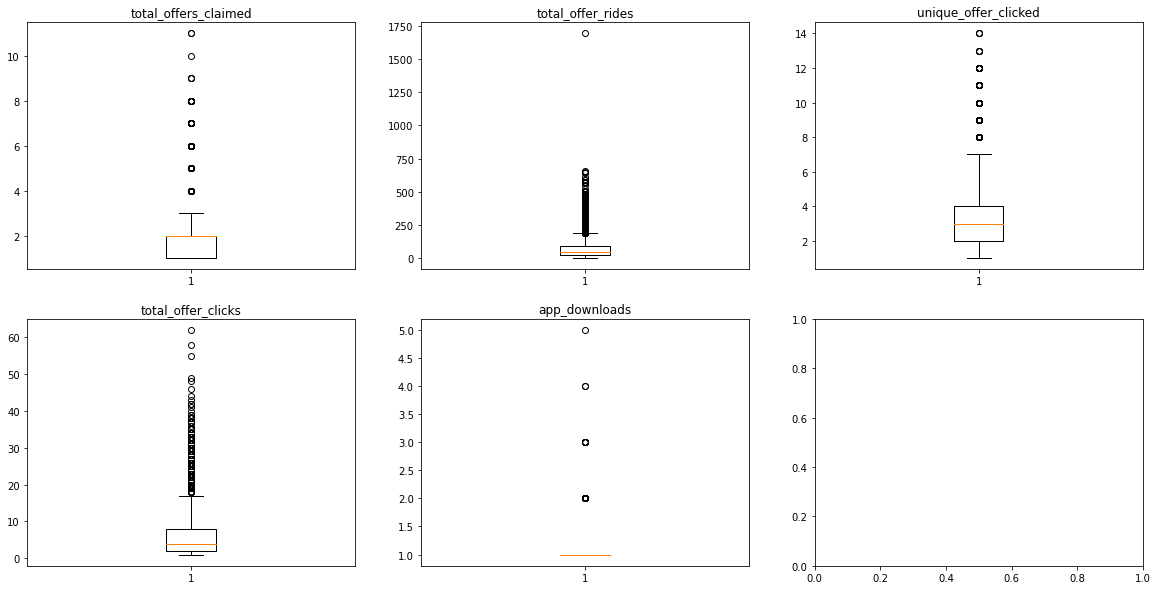

In [15]:
outlier_excl=['consumer_id',"gender",'duplicated','customer_age',"duplicated",'customer_age_imputed',
              'account_age','account_last_updated']
def IQR(df):
  df=df.loc[:, ~df.columns.isin(outlier_excl)]
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_outlier=((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
  return df_outlier.sort_values(ascending=False).reset_index()
no_of_outlier_threshold=100
outlier1=IQR(df)
print(outlier1.loc[outlier1[0]>no_of_outlier_threshold,:])

outlier_list1=outlier1.loc[outlier1[0]>no_of_outlier_threshold,:]["index"]
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))
for i, ax in zip(outlier_list1, axes.flatten()):
    ax.boxplot(df[i])
    ax.title.set_text(i)
plt.show()


##### Check Pearson Correlation 

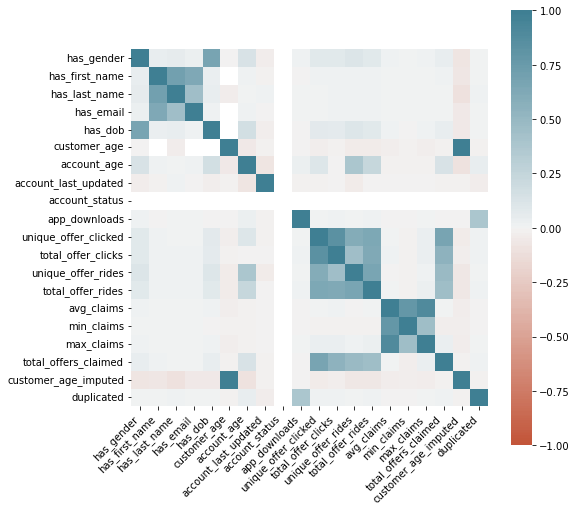

In [16]:
corr = df.corr()
plt.rcParams["figure.figsize"] = (8,8)

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right'
);

In [17]:
dummy_list = ['gender','duplicated']

# One hot encoding
for i in dummy_list:  
    print(i)
    print(df[i].nunique())
    df_d = pd.get_dummies(df[i],prefix=i, drop_first=False,dummy_na=False)
#   df = df.drop(columns = [i])
    df = pd.concat([df, df_d], axis=1,sort=False)

gender
3
duplicated
2


In [18]:
cols = [i.lower() for i in df.columns ]
df.columns = cols

In [19]:
account_feature= [
 'account_age',
 'account_last_updated',
 'app_downloads']

id_feature= ['has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'customer_age_imputed',
 'gender_f',
 'gender_m',
 'gender_missing',
 'duplicated_false',
 'duplicated_true']
claim_feature= [
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed']

In [20]:
profile_feature=['gender','has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'account_age',
 'account_last_updated',
 'app_downloads',
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed',
 'duplicated',
 'customer_age_imputed',
 'gender_f',
 'gender_m',
 'gender_missing',
 'duplicated_false',
 'duplicated_true']

train_feature=['app_downloads','unique_offer_clicked','total_offer_clicks','unique_offer_rides','total_offer_rides','total_offers_claimed']

profile_number=[
 'account_age',
 'account_last_updated',
 'app_downloads',
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed',
 'customer_age_imputed']
profile_cat=['gender','has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'duplicated']

In [21]:
df_train = df.loc[:,train_feature]

In [22]:
# from sklearn.preprocessing import StandardScaler
# df_db = df.loc[:,train_feature]
# scaler = StandardScaler()
# df_db = pd.DataFrame( scaler.fit_transform(df_db), columns = df_db.columns)

LinAlgError: singular matrix

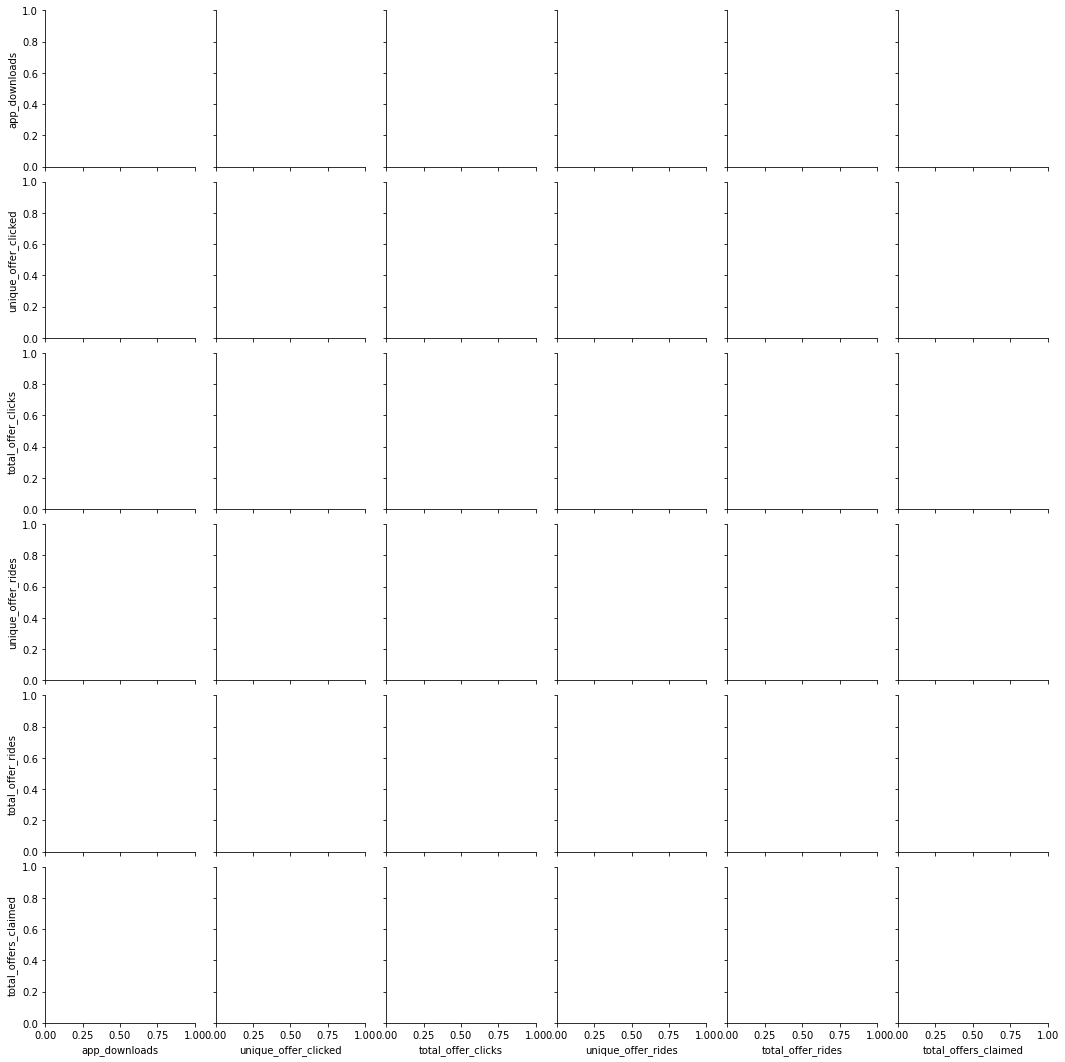

In [23]:
# from sklearn.cluster import DBSCAN
# # data = df[["sepal_length", "sepal_width"]]# specify & fit model
# model = DBSCAN(eps = 0.01, min_samples = 10).fit(df_db)
# labels = model.labels_
# df_db['labels']=model.labels_
# sns.pairplot(df_db,hue='labels')

In [ ]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [ ]:
account_feature= [
 'account_age',
 'account_last_updated',
 'app_downloads']

id_feature= ['has_first_name',
 'has_last_name',
 'has_email',
 'has_dob',
 'customer_age_imputed',
 'gender_f',
 'gender_m',
 'gender_missing',
 'duplicated_false',
 'duplicated_true']
claim_feature= [
 'unique_offer_clicked',
 'total_offer_clicks',
 'unique_offer_rides',
 'total_offer_rides',
 'avg_claims',
 'min_claims',
 'max_claims',
 'total_offers_claimed']

In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples=100, contamination=0.01, 
                         bootstrap=True, random_state=1)
print(iforest)

#fit the model
iforest.fit(df_train)

#get prediction from model
pred =iforest.predict(df_train)

#Visualise anomoly
anom_index = np.where(pred ==-1)
values = df_train.iloc[anom_index]
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20, 10))
for i, ax in zip(train_feature, axes.flatten()):
    for j in train_feature:
        if i!=j:
            ax.scatter(df_train[i], df_train[j],color='g')
            ax.scatter(values[i], values[j], color='r')
            ax.set_xlabel(i)
            ax.set_ylabel(j)
plt.show()          


In [ ]:
np.count_nonzero(pred == 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, random_state=1, n_estimators=100)
rf.fit(df_train, pred)  
importances = rf.feature_importances_
indices = np.argsort(importances)
features = df_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from datetime import datetime # Current date time in local system 

model_date = str(datetime.date(datetime.now())).replace("-", "_")
pickle.dump(iforest, open(path+"anomaly_iforest"+model_date+".pkl", "wb"))

In [ ]:
df_train

In [ ]:
df_trained=df[profile_feature]
df_trained['label']= pred
df_trained['label_name']= df_trained['label'].apply(lambda x: "Outlier" if (x==-1) else "Inliner")

In [ ]:
df_trained['label_name'].value_counts()

In [ ]:
df_trained.groupby(['label_name']).count()

In [ ]:
plt.rcParams["figure.figsize"] = (4,4)
for i in profile_cat: 
    df_pct = (df_trained.groupby(['label_name',i])['label'].count()/df_trained.groupby(['label_name'])['label'].count())*100
    df_pct.unstack().plot(kind = 'barh', stacked = True,rot=0)
    plt.xlabel('Proportion%')
    plt.ylabel('Type')
    plt.legend(title=i,loc='center right')

In [ ]:
plt.rcParams["figure.figsize"] = (4,4)
for i in profile_number: 
    df_trained.groupby('label_name')[i].mean().plot(kind = 'barh', color=['g','r'])
    plt.xlabel(i)
    plt.ylabel('Average')
    plt.show()
    


In [ ]:

iforest = pickle.load(open(path+"anomaly_iforest"+model_date+".pkl", "rb"))
pred_future = iforest.predict(df_predict)
